<a href="https://colab.research.google.com/github/CodingCat-Jung/SmartCity/blob/main/SmartCity02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,426 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and dire

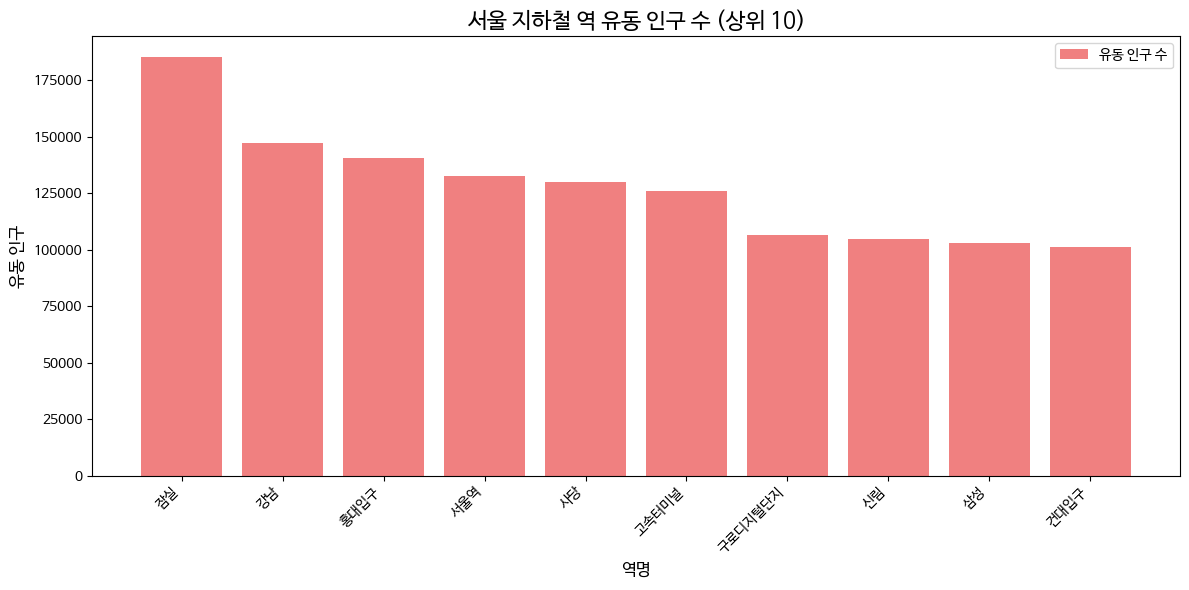

In [5]:
# 지하철역 승하차 순위 파악하기
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 서울교통공사_승하차순위_20231231.csv 파일 불러오기
df = pd.read_csv('서울교통공사_승하차순위_20231231.csv', encoding='cp949')
# df.head()

# 각 지하철 역별 승하차 계산
station_groups = df.groupby('역명')['일평균승하차인원'].sum().reset_index()

# 전체 승하차 인원 계산
total_floating_population = df['일평균승하차인원'].sum()

# 결과를 새로운 데이터프레임으로 저장
station_groups_df = station_groups

# 유동 인구 수 기준으로 정렬
df_sorted = station_groups_df.sort_values(by='일평균승하차인원', ascending=False)

# 결과를 새로운 CSV 파일로 저장
output_file = '지하철 역 유동인구 순위.csv'
df_sorted.to_csv(output_file, index=False, encoding='utf-8-sig')


plt.rc('font', family='NanumBarunGothic')

# 상위 10개 지하철역 추출
df_top10 = df_sorted.head(10)

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(df_top10['역명'], df_top10['일평균승하차인원'], color='lightcoral', label='유동 인구 수')

# 그래프 제목 및 레이블 설정
plt.title('서울 지하철 역 유동 인구 수 (상위 10)', fontsize=16)
plt.xlabel('역명', fontsize=12)
plt.ylabel('유동 인구', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

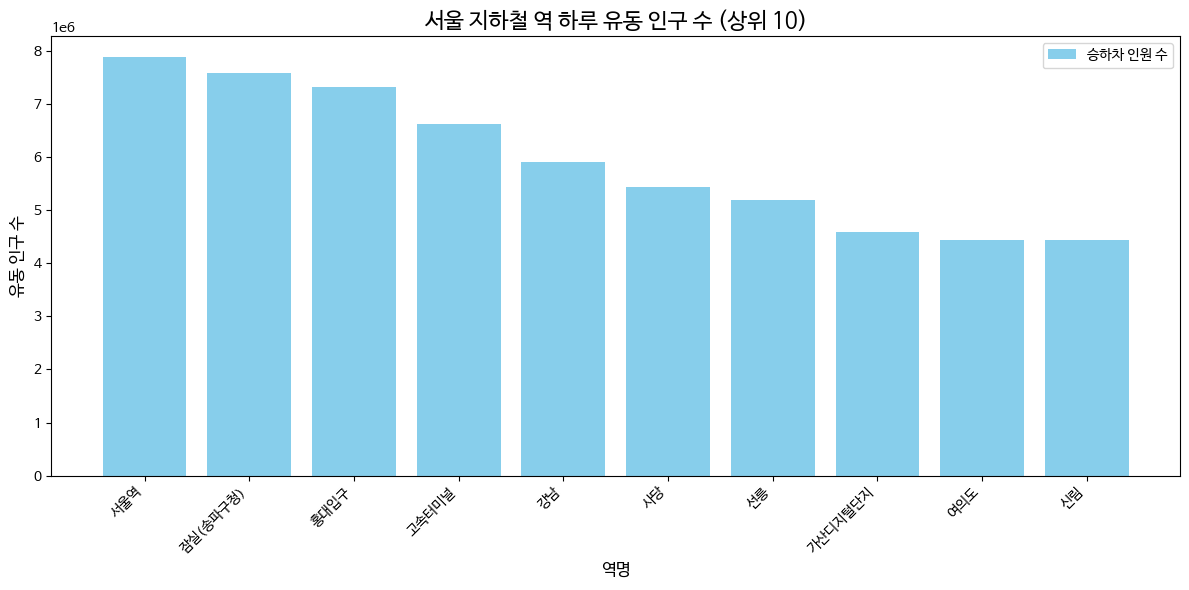

In [9]:
# 지하철역 승하차 순위 파악하기 2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터 불러오기
df = pd.read_csv('서울시 지하철호선별 역별 승하차 인원 정보.csv', encoding='cp949')

# 각 지하철 역별 승차와 하차 인원 합산
df['하루 총 승하차인원'] = df['승차총승객수'] + df['하차총승객수']

# 역명을 기준으로 그룹화하여 합산
station_groups = (
    df.groupby('역명')[['승차총승객수', '하차총승객수', '하루 총 승하차인원']]
    .sum()
    .reset_index()
)

# 승하차 총 인원 기준으로 정렬
df_sorted = station_groups.sort_values(by='하루 총 승하차인원', ascending=False)

# 결과를 새로운 CSV 파일로 저장
output_file = '지하철 역별 일 유동인구 순위.csv'
df_sorted.to_csv(output_file, index=False, encoding='utf-8-sig')

plt.rc('font', family='NanumBarunGothic')

# 상위 10개 지하철역 추출
df_top10 = df_sorted.head(10)

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(df_top10['역명'], df_top10['하루 총 승하차인원'], color='skyblue', label='승하차 인원 수')

# 그래프 제목 및 레이블 설정
plt.title('서울 지하철 역 하루 유동 인구 수 (상위 10)', fontsize=16)
plt.xlabel('역명', fontsize=12)
plt.ylabel('유동 인구 수', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()
